# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

**Future research Questions**:
Which applicants are more likely to get a loan:
1. Applicants with an extensive employment history (in years)
2. Married applicants with dependants and dual income
3. Applicants who apply for a shorter loan term.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


df = pd.read_csv("../data/data-2.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

#### 1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)

In a dataframe, use the command df.drop_duplicates(axis=0) [if nothing drops, df has all unique rows])

In [5]:
df[df['Credit_History'] == 1].nunique()

Loan_ID              475
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      404
CoapplicantIncome    224
LoanAmount           176
Loan_Amount_Term       9
Credit_History         1
Property_Area          3
Loan_Status            2
dtype: int64

#### 2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?

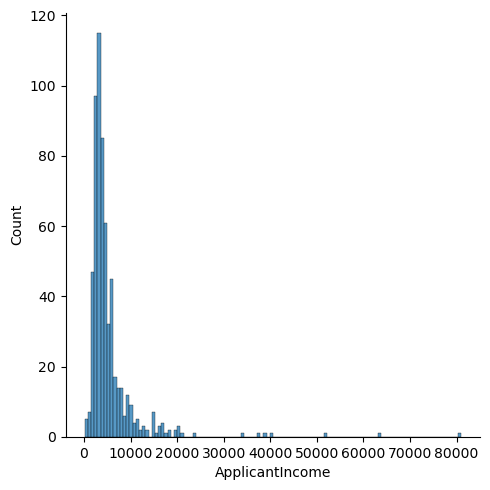

In [6]:
sns.displot(df['ApplicantIncome'])

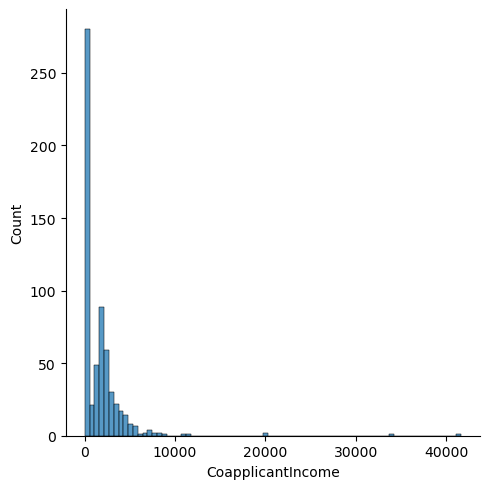

In [7]:
sns.displot(df['CoapplicantIncome'])

#### 3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.

In [8]:
meanincome = df['ApplicantIncome'].mean()

In [9]:
meanincome

5403.459283387622

In [10]:
medianincome = df['ApplicantIncome'].median()

In [11]:
medianincome

3812.5

In [12]:
income_delta = meanincome - medianincome
income_delta

1590.9592833876222

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [13]:
nominal_df = df.select_dtypes(include=object)
nominal_df.nunique()

Loan_ID          614
Gender             2
Married            2
Dependents         4
Education          2
Self_Employed      2
Property_Area      3
Loan_Status        2
dtype: int64

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [14]:
nominal_noid = nominal_df.drop('Loan_ID', axis=1)
nominal_noid.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [15]:
nominal_noid.value_counts().head(10)

Gender  Married  Dependents  Education  Self_Employed  Property_Area  Loan_Status
Male    Yes      0           Graduate   No             Semiurban      Y              36
                                                       Urban          Y              24
                                                       Rural          Y              23
                 2           Graduate   No             Semiurban      Y              18
                                                       Urban          Y              16
        No       0           Graduate   No             Semiurban      Y              15
                                                       Urban          Y              15
        Yes      1           Graduate   No             Urban          Y              14
        No       0           Graduate   No             Rural          Y              12
        Yes      0           Graduate   No             Rural          N              11
dtype: int64

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

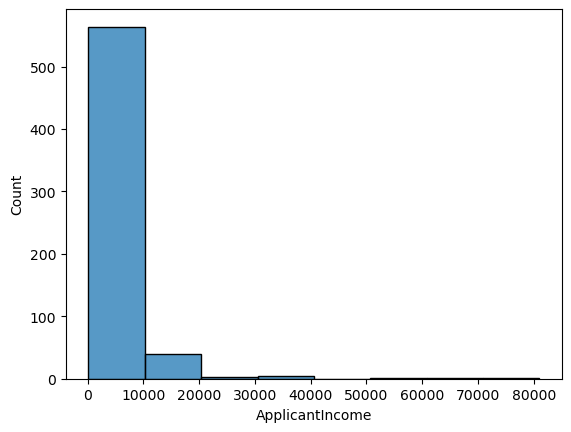

In [16]:
sns.histplot(df['ApplicantIncome'], bins=8)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

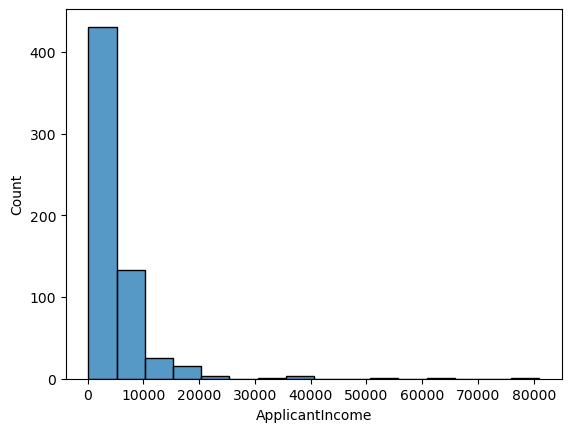

In [17]:
sns.histplot(df['ApplicantIncome'], bins=16)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

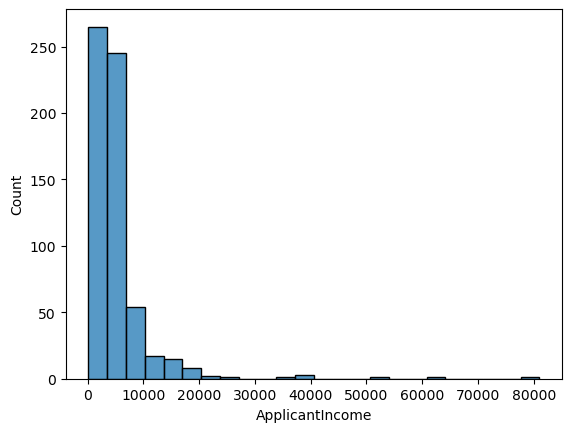

In [18]:
sns.histplot(df['ApplicantIncome'], bins=24)


Look at box plots to understand the distributions. 

In [19]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

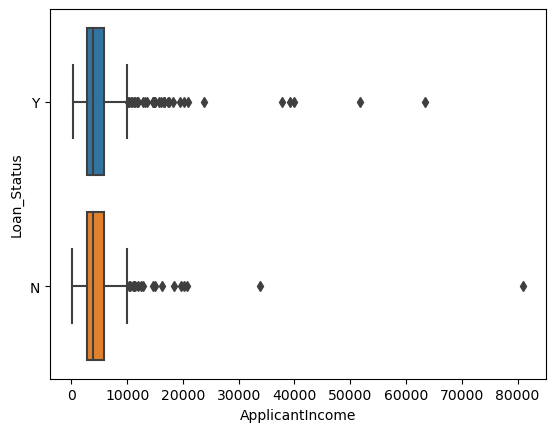

In [20]:
sns.boxplot(data=df, x='ApplicantIncome', y='Loan_Status')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

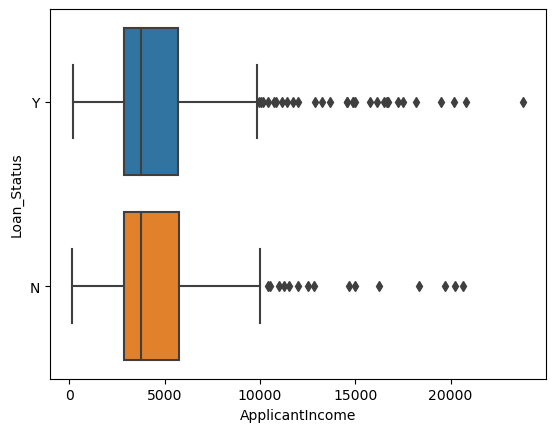

In [21]:
sns.boxplot(data=df[df['ApplicantIncome'] < 30000], x='ApplicantIncome', y='Loan_Status')

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

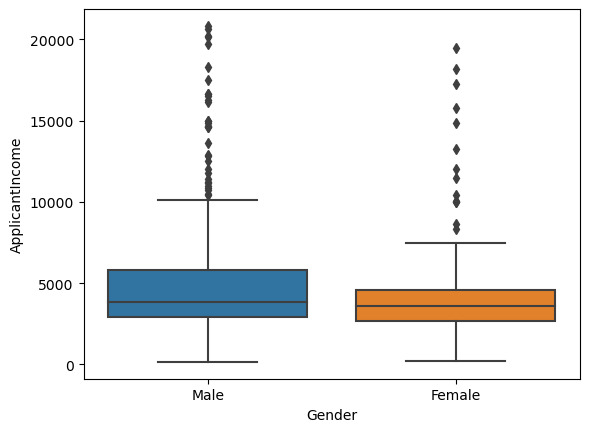

In [22]:
sns.boxplot(data=df[df['ApplicantIncome'] < 30000], y='ApplicantIncome', x='Gender')

Do not equate the medians, they are not the same.

Look at the distribution of income segregated  by `Education`

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

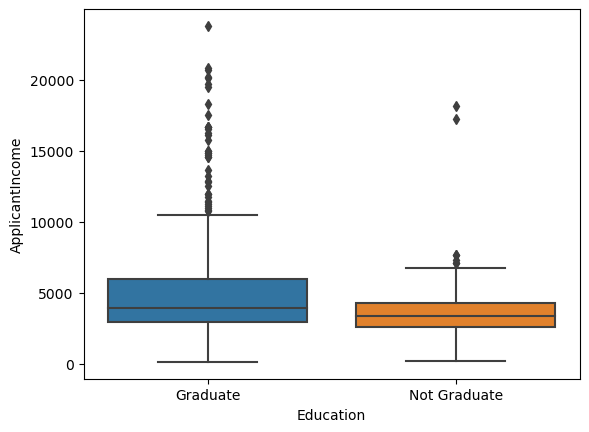

In [23]:
sns.boxplot(data=df[df['ApplicantIncome'] < 30000], y='ApplicantIncome', x='Education')

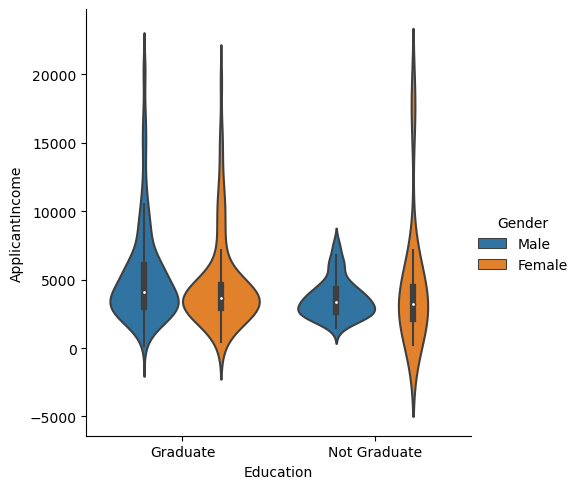

In [24]:
sns.catplot(data=df[df['ApplicantIncome'] < 30000], x='Education', y='ApplicantIncome', hue='Gender', kind='violin')
plt.savefig("../images/gender_education_violin.png")

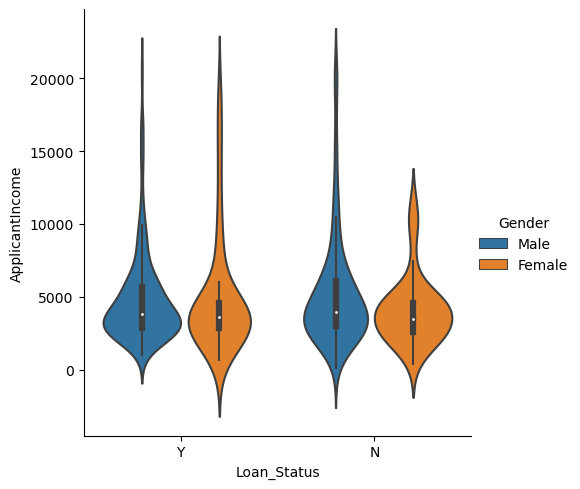

In [25]:
sns.catplot(data=df[df['ApplicantIncome'] < 30000], x='Loan_Status', y='ApplicantIncome', hue='Gender', kind='violin')
plt.savefig("../images/gender_loanstatus_violin.png")

Look at the histogram and boxplot of LoanAmount

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

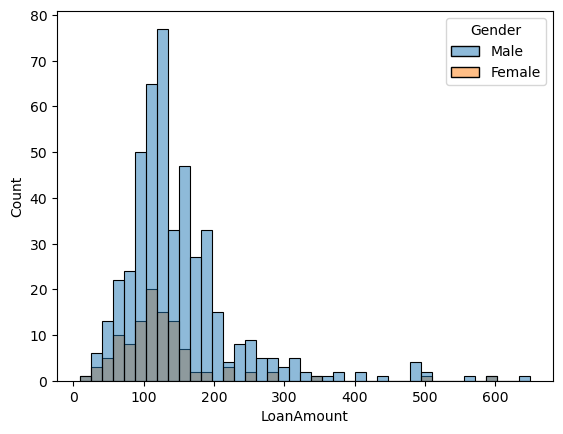

In [26]:
sns.histplot(data=df, x='LoanAmount', hue='Gender')

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

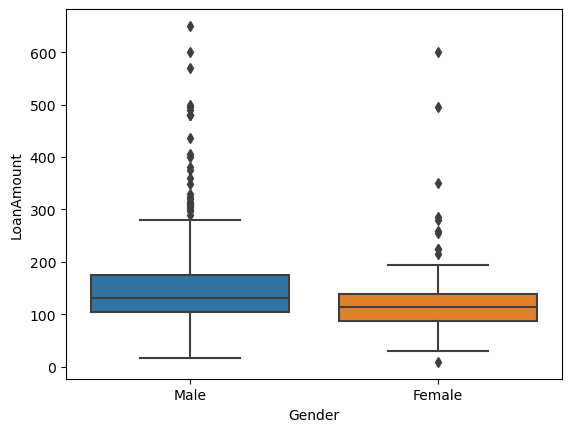

In [27]:
sns.boxplot(data=df, x='Gender', y='LoanAmount')

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [28]:
def make_pie(df, data, label, title):
    """
    This will turn any two features into a pie chart.
    
    df = DataFrame
    data = feature column label <where values are numerical>
    label = feature column label <preferrably categorical>
    """
    colors = sns.color_palette('pastel')[0:len(df[label].unique())]
    
    plt.title(f"{title}")
    plt.pie(df[data], labels=df[label].unique(), colors = colors, autopct='%.0f%%')
    
    plt.savefig(f'../images/{title}_pie.png')


In [29]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

This could be done with a group by

Make sure to know how to explain what the pivot_table is actually doing to the numerical columns.

In [30]:
marriage_pivot = df.pivot_table(index=['Married', 'Education', 'Gender'])

In [31]:
marriage_pivot.sort_values('ApplicantIncome', ascending=False)

ApplicantIncome  CoapplicantIncome  \
Married Education    Gender                                       
Yes     Graduate     Male        6106.112727        1913.152436   
No      Graduate     Male        5710.777778        1687.969697   
        Not Graduate Female      5289.142857         168.928571   
Yes     Graduate     Female      5246.920000        1361.400000   
No      Graduate     Female      4337.196970        1200.545455   
        Not Graduate Male        3720.387097        1023.129032   
Yes     Not Graduate Male        3595.914634        1543.865854   
                     Female      3091.000000        1410.166667   

                             Credit_History  LoanAmount  Loan_Amount_Term  
Married Education    Gender                                                
Yes     Graduate     Male          0.873016  162.281955        338.453532  
No      Graduate     Male          0.842105  145.968421        355.102041  
        Not Graduate Female        0.857143  106.384615        360.000000  
Yes     Graduate     Female        0.869565  160.520000        346.560000  
No      Graduate     Female        0.813559  118.061538        354.092308  
        Not Graduate Male          0.857143  104.800000        327.200000  
Yes     Not Graduate Male          0.756757  125.441558        327.341772  
                     Female        0.750000  123.333333        360.000000

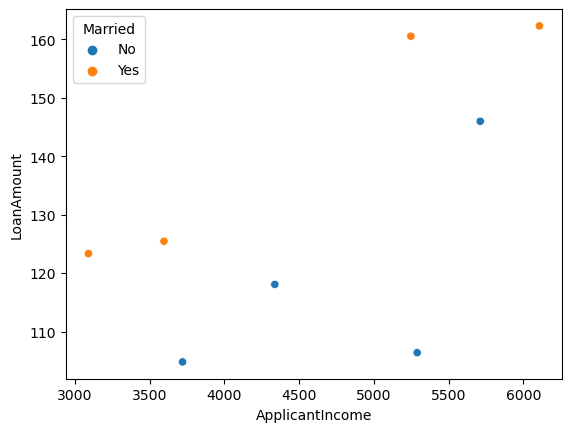

In [32]:
sns.scatterplot(marriage_pivot, x='ApplicantIncome', y='LoanAmount', hue='Married')
plt.savefig("../images/income_loanamt_scatter")
# Try this with other indexes to see if trend

<AxesSubplot:ylabel='Married-Education-Gender'>

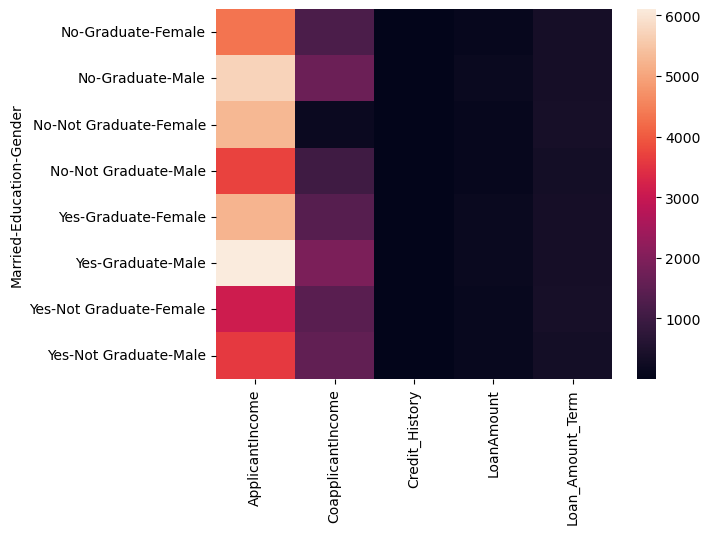

In [33]:
sns.heatmap(marriage_pivot)
# Be careful of independent variables due to colinearity 
# Look up Variance Inflation Factors - VIF (after) 

In [34]:
marriage_reset = marriage_pivot.reset_index()
marriage_reset

,Married,Education,Gender,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
0,No,Graduate,Female,4337.196970,1200.545455,0.813559,118.061538,354.092308
1,No,Graduate,Male,5710.777778,1687.969697,0.842105,145.968421,355.102041
2,No,Not Graduate,Female,5289.142857,168.928571,0.857143,106.384615,360.000000
3,No,Not Graduate,Male,3720.387097,1023.129032,0.857143,104.800000,327.200000
4,Yes,Graduate,Female,5246.920000,1361.400000,0.869565,160.520000,346.560000
5,Yes,Graduate,Male,6106.112727,1913.152436,0.873016,162.281955,338.453532
6,Yes,Not Graduate,Female,3091.000000,1410.166667,0.750000,123.333333,360.000000
7,Yes,Not Graduate,Male,3595.914634,1543.865854,0.756757,125.441558,327.341772


In [35]:
marriage_reset['Profile'] = marriage_reset['Gender'] +', ' + marriage_reset['Married'].map({'No':'Single','Yes':'Married'}) + ', ' + marriage_reset['Education']

In [36]:
marriage_reset

,Married,Education,Gender,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term,Profile
0,No,Graduate,Female,4337.196970,1200.545455,0.813559,118.061538,354.092308,"Female, Single, Graduate"
1,No,Graduate,Male,5710.777778,1687.969697,0.842105,145.968421,355.102041,"Male, Single, Graduate"
2,No,Not Graduate,Female,5289.142857,168.928571,0.857143,106.384615,360.000000,"Female, Single, Not Graduate"
3,No,Not Graduate,Male,3720.387097,1023.129032,0.857143,104.800000,327.200000,"Male, Single, Not Graduate"
4,Yes,Graduate,Female,5246.920000,1361.400000,0.869565,160.520000,346.560000,"Female, Married, Graduate"
5,Yes,Graduate,Male,6106.112727,1913.152436,0.873016,162.281955,338.453532,"Male, Married, Graduate"
6,Yes,Not Graduate,Female,3091.000000,1410.166667,0.750000,123.333333,360.000000,"Female, Married, Not Graduate"
7,Yes,Not Graduate,Male,3595.914634,1543.865854,0.756757,125.441558,327.341772,"Male, Married, Not Graduate"


In [37]:
make_pie(marriage_reset, 'ApplicantIncome', 'Profile')

TypeError: make_pie() missing 1 required positional argument: 'title'

In [41]:
df['Profile'] = df['Gender'] +', ' + df['Married'].map({'No':'Single','Yes':'Married'}) + ', ' + df['Education']


In [42]:
df_loans = df.groupby(['Profile'], as_index=False)['Loan_Status'].value_counts()

In [43]:
df_loans

,Profile,Loan_Status,count
0,"Female, Married, Graduate",Y,18
1,"Female, Married, Graduate",N,7
2,"Female, Married, Not Graduate",Y,5
3,"Female, Married, Not Graduate",N,1
4,"Female, Single, Graduate",Y,42
5,"Female, Single, Graduate",N,24
6,"Female, Single, Not Graduate",Y,9
7,"Female, Single, Not Graduate",N,5
8,"Male, Married, Graduate",Y,207
9,"Male, Married, Graduate",N,68


In [44]:
df_loans_approved = df_loans[df_loans['Loan_Status'] == 'Y']

In [45]:
df_loans_approved

,Profile,Loan_Status,count
0,"Female, Married, Graduate",Y,18
2,"Female, Married, Not Graduate",Y,5
4,"Female, Single, Graduate",Y,42
6,"Female, Single, Not Graduate",Y,9
8,"Male, Married, Graduate",Y,207
10,"Male, Married, Not Graduate",Y,49
12,"Male, Single, Graduate",Y,62
14,"Male, Single, Not Graduate",Y,19


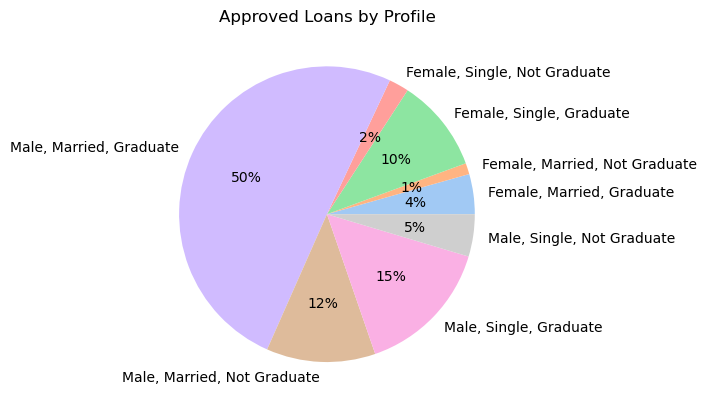

In [46]:
make_pie(df_loans_approved, 'count', 'Profile', "Approved Loans by Profile")

In [47]:
df_loans_denied = df_loans[df_loans['Loan_Status'] == 'N']

In [48]:
df_loans_denied

,Profile,Loan_Status,count
1,"Female, Married, Graduate",N,7
3,"Female, Married, Not Graduate",N,1
5,"Female, Single, Graduate",N,24
7,"Female, Single, Not Graduate",N,5
9,"Male, Married, Graduate",N,68
11,"Male, Married, Not Graduate",N,33
13,"Male, Single, Graduate",N,37
15,"Male, Single, Not Graduate",N,12


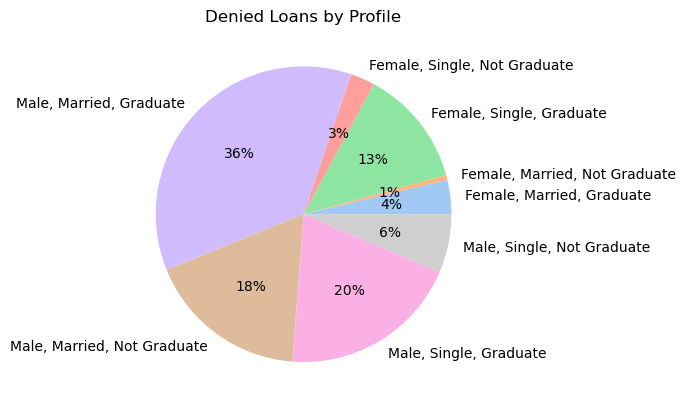

In [49]:
make_pie(df_loans_denied, 'count', 'Profile', "Denied Loans by Profile")

In [99]:
df['Gender_Marriage'] = df['Gender'] + ', ' + df['Married'] 

In [100]:
loan_amount_gender = df.groupby(['Gender_Marriage'], as_index=False)['LoanAmount'].mean()

In [101]:
loan_amount_gender

,Gender_Marriage,LoanAmount
0,"Female, No",116.115385
1,"Female, Yes",153.322581
2,"Male, No",136.088000
3,"Male, Yes",154.011662


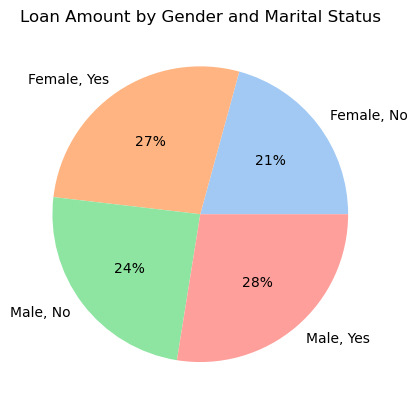

In [103]:
make_pie(loan_amount_gender, 'LoanAmount', 'Gender_Marriage', "Loan Amount by Gender and Marital Status")

In [104]:
property_pivot = df.pivot_table(index=['Property_Area']).reset_index()

In [105]:
property_pivot

,Property_Area,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
0,Rural,5554.083799,1645.536983,0.830303,152.260116,345.531429
1,Semiurban,5292.261803,1520.133047,0.861751,145.504386,347.113043
2,Urban,5398.247525,1716.350495,0.829670,142.198953,332.800000


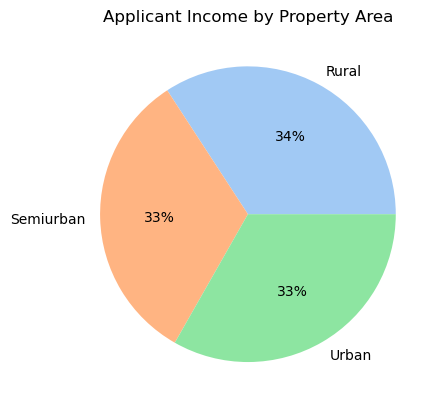

In [108]:
make_pie(property_pivot, 'ApplicantIncome', 'Property_Area', "Applicant Income by Property Area")

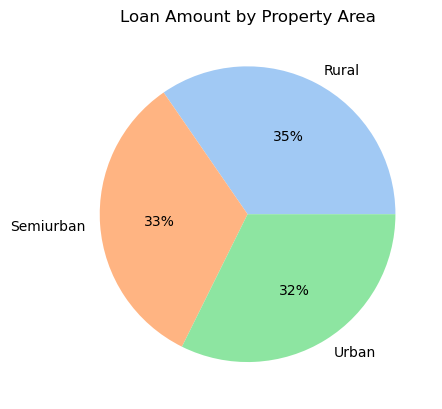

In [109]:
make_pie(property_pivot, 'LoanAmount', 'Property_Area', "Loan Amount by Property Area")

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [110]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Profile              16
Gender_Marriage      16
dtype: int64

In [111]:
# Fill ordinal catergorical NaNs with mode
df = df.fillna(df.select_dtypes(include=object).mode().iloc[0])

In [112]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Profile               0
Gender_Marriage       0
dtype: int64

In [113]:
# Fill nominal valued NaNs with median
df = df.fillna(df.select_dtypes(include='number').median().iloc[0])

In [114]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Profile              0
Gender_Marriage      0
dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

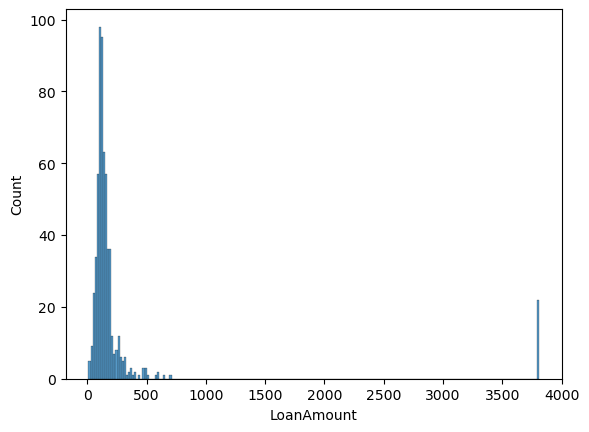

In [118]:
# Plot Histogram before Transformation
sns.histplot(df['LoanAmount'])
plt.savefig("../data/loan_amount_histogram.png")

In [119]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])

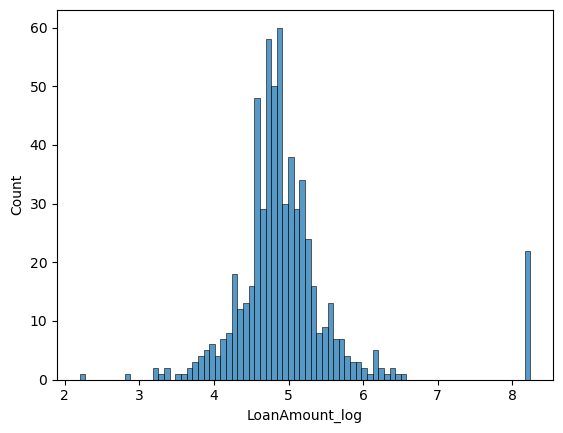

In [120]:
# Plot Histogram after Transformation
sns.histplot(df['LoanAmount_log'], bins=80)
plt.savefig("../data/loan_amount_log_histogram.png")

Combine both incomes as total income and take a log transformation of the same.

In [121]:
# Combine both incomes
df['CombinedIncome'] = df['ApplicantIncome']+df['CoapplicantIncome']

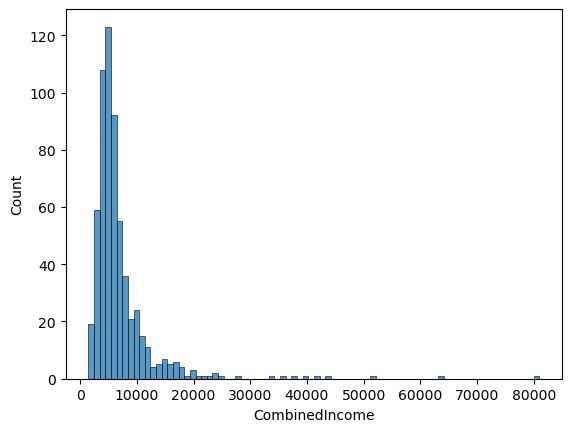

In [122]:
# plot histogram prior to log transform
sns.histplot(df['CombinedIncome'], bins=80)
plt.savefig("../data/combined_income_histogram.png")

In [125]:
# log transform new column
df['CombinedIncome_log'] = np.log(df['CombinedIncome'])

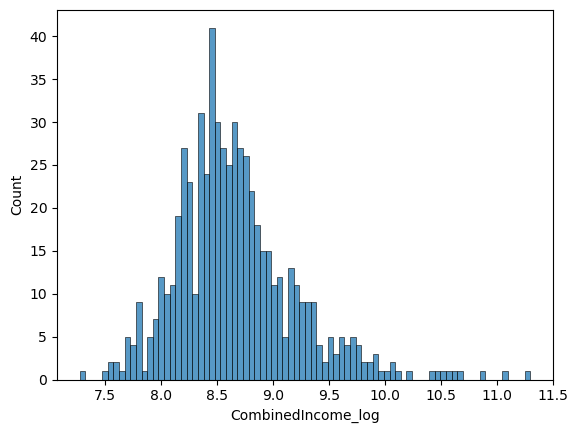

In [126]:
# Plot histogram after the log transform
sns.histplot(df['CombinedIncome_log'], bins=80)
plt.savefig("../data/combined_income_log_histogram.png")

### 3.5 Apply feature engineering to main df


In [127]:
df['Profile'] = df['Gender'] +', ' + df['Married'].map({'No':'Single','Yes':'Married'}) + ', ' + df['Education']

In [128]:
#Isolate and map loan status (for target)
y = df['Loan_Status'].map({'N':0,'Y':1})
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [129]:
#Drop target and id column from main data
df_drop = df.drop(['Loan_ID', 'Loan_Status'], axis=1)

In [130]:
df_drop

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Profile,Gender_Marriage,LoanAmount_log,CombinedIncome,CombinedIncome_log
0,Male,No,0,Graduate,No,5849,0.0,3812.5,360.0,1.0,Urban,"Male, Single, Graduate","Male, No",8.246040,5849.0,8.674026
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,"Male, Married, Graduate","Male, Yes",4.852030,6091.0,8.714568
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,"Male, Married, Graduate","Male, Yes",4.189655,3000.0,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,"Male, Married, Not Graduate","Male, Yes",4.787492,4941.0,8.505323
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,"Male, Single, Graduate","Male, No",4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,"Female, Single, Graduate","Female, No",4.262680,2900.0,7.972466
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,"Male, Married, Graduate","Male, Yes",3.688879,4106.0,8.320205
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,"Male, Married, Graduate","Male, Yes",5.533389,8312.0,9.025456
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,"Male, Married, Graduate","Male, Yes",5.231109,7583.0,8.933664


In [131]:
#One hot encode Object dtypes
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')

In [132]:
# Make categorical dataframe
cat_df = df_drop.select_dtypes(include=object)
cat_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Profile,Gender_Marriage
0,Male,No,0,Graduate,No,Urban,"Male, Single, Graduate","Male, No"
1,Male,Yes,1,Graduate,No,Rural,"Male, Married, Graduate","Male, Yes"
2,Male,Yes,0,Graduate,Yes,Urban,"Male, Married, Graduate","Male, Yes"
3,Male,Yes,0,Not Graduate,No,Urban,"Male, Married, Not Graduate","Male, Yes"
4,Male,No,0,Graduate,No,Urban,"Male, Single, Graduate","Male, No"


In [133]:
# Make numerical dataframe
num_df = df_drop.select_dtypes(exclude=object)
num_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,CombinedIncome,CombinedIncome_log
0,5849,0.0,3812.5,360.0,1.0,8.246040,5849.0,8.674026
1,4583,1508.0,128.0,360.0,1.0,4.852030,6091.0,8.714568
2,3000,0.0,66.0,360.0,1.0,4.189655,3000.0,8.006368
3,2583,2358.0,120.0,360.0,1.0,4.787492,4941.0,8.505323
4,6000,0.0,141.0,360.0,1.0,4.948760,6000.0,8.699515


In [134]:
# Make lists of column names
num_labels = list(num_df.columns)
cat_labels = list(cat_df.columns)

MAKE SURE TO DROP ONE OF THE BINARY COLUMNS

In [135]:
# Get dummies for categorical
ohe_cat_df = pd.get_dummies(cat_df, columns=cat_labels, drop_first=True)
ohe_cat_df.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,"Profile_Female, Married, Not Graduate","Profile_Female, Single, Graduate","Profile_Female, Single, Not Graduate","Profile_Male, Married, Graduate","Profile_Male, Married, Not Graduate","Profile_Male, Single, Graduate","Profile_Male, Single, Not Graduate","Gender_Marriage_Female, Yes","Gender_Marriage_Male, No","Gender_Marriage_Male, Yes"
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
3,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [136]:
#Scale numerical with min/max
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()

^ This is normally used for data that requires or has regularization.

In [137]:
num_df = mx.fit_transform(num_df)
num_scaled_df = pd.DataFrame(num_df, columns=num_labels)
num_scaled_df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,CombinedIncome,CombinedIncome_log
0,0.070489,0.000000,1.000000,0.091567,0.000262,1.000000,0.055394,0.347590
1,0.054830,0.036192,0.031287,0.091567,0.000262,0.438897,0.058435,0.357654
2,0.035250,0.000000,0.014986,0.091567,0.000262,0.329392,0.019583,0.181853
3,0.030093,0.056592,0.029184,0.091567,0.000262,0.428227,0.043980,0.305712
4,0.072356,0.000000,0.034705,0.091567,0.000262,0.454888,0.057292,0.353918
...,...,...,...,...,...,...,...,...
609,0.034014,0.000000,0.016301,0.091567,0.000262,0.341464,0.018326,0.173438
610,0.048930,0.000000,0.008150,0.044205,0.000262,0.246603,0.033485,0.259759
611,0.097984,0.005760,0.064151,0.091567,0.000262,0.551540,0.086352,0.434828
612,0.091936,0.000000,0.046799,0.091567,0.000262,0.501567,0.077189,0.412042


In [138]:
#Concatenate the dummy df to the scaled num df, define as X
X = pd.concat([ohe_cat_df, num_scaled_df], axis=1)
X.tail()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,"Profile_Female, Married, Not Graduate",...,"Gender_Marriage_Male, No","Gender_Marriage_Male, Yes",ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,CombinedIncome,CombinedIncome_log
609,0,0,0,0,0,0,0,0,0,0,...,0,0,0.034014,0.00000,0.016301,0.091567,0.000262,0.341464,0.018326,0.173438
610,1,1,0,0,1,0,0,0,0,0,...,0,1,0.048930,0.00000,0.008150,0.044205,0.000262,0.246603,0.033485,0.259759
611,1,1,1,0,0,0,0,0,1,0,...,0,1,0.097984,0.00576,0.064151,0.091567,0.000262,0.551540,0.086352,0.434828
612,1,1,0,1,0,0,0,0,1,0,...,0,1,0.091936,0.00000,0.046799,0.091567,0.000262,0.501567,0.077189,0.412042
613,0,0,0,0,0,0,1,1,0,0,...,0,0,0.054830,0.00000,0.032602,0.091567,0.000000,0.445232,0.039481,0.287041


## 4. Building a Predictive Model

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [140]:
RFC = RandomForestClassifier()

In [141]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.22)

In [142]:
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [143]:
y_pred = RFC.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1])

In [144]:
print("The accuracy score:\n")
print(metrics.accuracy_score(y_test, y_pred), '\n')
print("The f1 score:\n")
print(metrics.f1_score(y_test, y_pred),'\n')
print("The precision score:\n")
print(metrics.precision_score(y_test, y_pred),'\n')
print("The recall score:\n")
print(metrics.recall_score(y_test, y_pred),'\n')

The accuracy score:

0.7647058823529411 

The f1 score:

0.8350515463917525 

The precision score:

0.8181818181818182 

The recall score:

0.8526315789473684 



Try paramater grid search to improve the results

In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:
# Parameter dictionary
params = {"n_estimators" : np.arange(100,2000,200),
          "max_depth" : np.arange(1,15,2),
          "min_samples_split" : np.arange(2,10,2)
         }

In [147]:
GSCV = GridSearchCV(estimator=RFC, param_grid=params, n_jobs=-1)

In [148]:
GSCV.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([ 100,  300,  500,  700,  900, 1100, 1300, 1500, 1700, 1900])})

In [149]:
GSCV.predict(X_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1])

In [150]:
print("Best Parameters:", GSCV.best_params_)
print("Best Score:", GSCV.best_score_)


Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.7970614035087719


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

# REFER TO NOTEBOOK Model_Pipeline.ipynb

In [151]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

class DataTransformations():
    def __init__(self, func):
        self.func = func

    def transform(self, input_df, **transform_params):
        return self.func(input_df)

    def fit(self, X, y=None, **fit_params):
        return self
    
    def impute_nulls(df):
        df = df.fillna(df.select_dtypes(include=object).mode().iloc[0])
        df = df.fillna(df.select_dtypes(include='number').median().iloc[0])
        return df
    
    def make_dummies(df):
        from sklearn.preprocessing import MinMaxScaler

        # Separate object columns from numerical
        num_df = df_drop.select_dtypes(exclude=object)
        cat_df = df_drop.select_dtypes(include=object)

        # Make label lists from column names
        num_labels = list(num_df.columns)
        cat_labels = list(cat_df.columns)

        # Conduct encoding of each category column
        ohe_cat_df = pd.get_dummies(cat_df, columns=cat_labels, drop_first=True)

        # Concatenate OHE dataframe to numerical
        X = pd.concat([ohe_cat_df, num_df], axis=1)
        return X

In [140]:
def make_profile(df):
    df['Profile'] = df['Gender'] +', ' + df['Married'].map({'No':'Single','Yes':'Married'}) + ', ' + df['Education']
    return df

In [141]:
def make_dummies(df):

    # Separate object columns from numerical
    num_df = df_drop.select_dtypes(exclude=object)
    cat_df = df_drop.select_dtypes(include=object)

    # Make label lists from column names
    num_labels = list(num_df.columns)
    cat_labels = list(cat_df.columns)

    # Conduct encoding of each category column
    ohe_cat_df = pd.get_dummies(cat_df, columns=cat_labels, drop_first=True)

    # Concatenate OHE dataframe to numerical
    X = pd.concat([ohe_cat_df, num_df], axis=1)
    return X

In [142]:
profile_maker = FunctionTransformer(make_profile)
dummy_maker = FunctionTransformer(make_dummies)

In [143]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,CombinedIncome,CombinedIncome_log,Profile
0,LP001002,Male,No,0,Graduate,No,5849,0.0,3812.5,360.0,1.0,Urban,Y,8.246040,5849.0,8.674026,"Male, Single, Graduate"
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568,"Male, Married, Graduate"
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368,"Male, Married, Graduate"
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323,"Male, Married, Not Graduate"
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515,"Male, Single, Graduate"


In [176]:
# This dataset is way too high-dimensional. Better do PCA:
pca = PCA(n_components=2)

# Maybe some of the original features were good, too?
selection = SelectKBest(k=3)

#Define the model
rfc = RandomForestClassifier()

In [177]:
 preprocess = ColumnTransformer([('profile', profile_maker),
                                 ('dummy', dummy_maker)])

featureselect = FeatureUnion([("pca", pca), 
                              ("univ_select", selection)])

pipeline = Pipeline ([("preprocess", preprocess),
                      ("featselect", featureselect),
                      ("rfc", rfc)])

In [178]:
# set up our parameters grid
param_grid = {"featselect__pca__n_components": [1, 2, 3],
              "featselect__univ_select__k": [1, 2, 3],
              "rfc__n_estimators" : np.arange(200,600,200),
              "rfc__max_depth" : np.arange(2,6,2),
              "rfc__min_samples_split" : np.arange(2,6,2)}

In [179]:
grid_search = GridSearchCV(pipeline, param_grid, verbose=10, refit=True)

In [180]:
grid_search.fit(X,y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START featselect__pca__n_components=1, featselect__univ_select__k=1, rfc__max_depth=2, rfc__min_samples_split=2, rfc__n_estimators=200
[CV 1/5; 1/72] END featselect__pca__n_components=1, featselect__univ_select__k=1, rfc__max_depth=2, rfc__min_samples_split=2, rfc__n_estimators=200;, score=nan total time=   0.0s
[CV 2/5; 1/72] START featselect__pca__n_components=1, featselect__univ_select__k=1, rfc__max_depth=2, rfc__min_samples_split=2, rfc__n_estimators=200
[CV 2/5; 1/72] END featselect__pca__n_components=1, featselect__univ_select__k=1, rfc__max_depth=2, rfc__min_samples_split=2, rfc__n_estimators=200;, score=nan total time=   0.0s
[CV 3/5; 1/72] START featselect__pca__n_components=1, featselect__univ_select__k=1, rfc__max_depth=2, rfc__min_samples_split=2, rfc__n_estimators=200
[CV 3/5; 1/72] END featselect__pca__n_components=1, featselect__univ_select__k=1, rfc__max_depth=2, rfc__min_samples_split=2, rfc_

ValueError: 
All the 360 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/pipeline.py", line 336, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/pipeline.py", line 870, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py", line 686, in fit_transform
    self._validate_transformers()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py", line 346, in _validate_transformers
    names, transformers, _ = zip(*self.transformers)
ValueError: not enough values to unpack (expected 3, got 2)


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

# REFER TO NOTEBOOK Model_Pipeline.ipynb